# Thompson Sampling (TS)
We will be using TS to solve the multi-armed bandit problem.

# TS Algorithm Visualization
<img src="images/ts/ts_visual.png" height="75%" width="75%"></img>
- These vertical lines represent the expected return (center of distribution) of each machine

Based on the expected returns, the yellow machine is the optimal machine
- The machine doesn't actually know the expected returns, but this diagram provides it for visualization purposes

### Trial Runs
We need to perform trial runs for each machine to construct approximate distributions.

These distributions are an auxillary mechanism to approximate the expected return value.
- The mid-point of each distribution is the current return value, which will converge to the expected return value

<img src="images/ts/trial_runs.png" height="75%" width="75%"></img>
- The blue dots are the trial runs for the Blue machine
- The green dots are the trial runs for the Green machine
- The yellow dots are the trial runs for the Yellow machine

Using the trial runs of each machine, we constructed approximate distributions for each machine at the current state.

Unlike the UCB which is deterministic (the highest upper confidence bound is chosen), Thompson Sampling uses a probabilistic perception of the decision-making.

### Continue Round 1
Let's run more rounds.

The program randomly picks a value from each machine's distribution, referred to as the "prior distributions".

<img src="images/ts/bandit_configuration_1.png" height="75%" width="75%"></img>
- Bandit Configuration: A hypothetical set of machines using the prior distributions

As seen in the diagram above, the green point randomly chose a point with the highest return. Therefore, the program will choose the Green machine to play. 

Now the Green machine is played, and it returns a value after playing it. The current distribution will shift to that value, and the distribution will become narrower because the program has more information about that machine.

<img src="images/ts/shift_configuration_1.png" height="75%" width="75%"></img>
- The green dot is the value returned after playing the Green machine

As seen, the green distribution shifted to the returned value, then became narrower. This new distribution is referred to as the "posterior distribution"

### Continue Round 2
Let's do another round.

<img src="images/ts/bandit_configuration_2.png" height="75%" width="75%"></img>

Clearly, the yellow point randomly chosen has the highest return value. Therefore, the program will choose the Yellow machine to play.

Now the Yellow machine is played, and it returns a value after playing it.

<img src="images/ts/shift_configuration_2.png" height="75%" width="75%"></img>

As seen, the yellow distribution shifted to the returned value, then became narrower.

### After a Few Rounds
After a few rounds, the distributions will converge to their expected return values.

<img src="images/ts/few_rounds.png" height="75%" width="75%"></img>

# UCB vs TS
What are the main differences between the two?

<img src="images/ts/ucb_vs_ts.png" height="75%" width="75%"></img>

What it means by "better empirical evidence" is that Thompson Sampling is heavily researched, and typically works better.

In [1]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import the data set
ads_opt_df = pd.read_csv("datasets/ads_ctr_optimization.csv")

"""
Each row represents a round (or consumer), and if clicked the ad (1) or did not click the ad (0).

In the real world, we wouldn't have this data set and instead the TS algorithm would
explore and exploit simutaneously to determine the optimal ad while users are clicking.
Therefore, as this data set is created, the TS algorithm will run.

For testing purposes, we're going to simulate the "real world" in the TS algorithm.
"""
ads_opt_df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
rounds = 10_000 # number of rows in the data frame
ads = 10 # number of columns in the data frame

# Thompson Sampling Model
UCB gave us a total reward around ~2200, but can Thompson Sampling beat that?

### TS Algorithm
<img src="images/ts/ts_algorithm.png" height="75%" width="75%"></img>
- Oi(n) is the probability of success (probability of receiving a one)

As seen below, the total reward using TS is around ~2600, which is better than the UCB reward value.

In [4]:
# import the libraries
import math
import random

In [5]:
# list that stores which ad that was selected at each round
ads_selected = []

# number of times each ad got a positive reward
numbers_of_positives = [0] * ads

# number of times each ad got a negative reward
numbers_of_negatives = [0] * ads

In [6]:
total_reward = 0

# iterate through each row (round) in the data frame
for current_round in range(0, rounds):
    max_random_point = 0
    ad_to_select = 0
    
    # iterate through each column (ad) in the data frame
    for ad in range(0, ads):
        # take a random draw (point) from the distribution
        random_point = random.betavariate(numbers_of_positives[ad] + 1,
                                          numbers_of_negatives[ad] + 1)
        
        if random_point > max_random_point:
            # found a larger random point, update the max random point and the ad to select
            max_random_point = random_point
            ad_to_select = ad
    
    # store the results of this round
    ads_selected.append(ad_to_select)
    reward = ads_opt_df.values[current_round][ad_to_select]
    total_reward += reward
    
    # update the reward status
    if reward == 1:
        numbers_of_positives[ad_to_select] += 1
    elif reward == 0:
        numbers_of_negatives[ad_to_select] += 1
    
print("Total Reward: " + str(total_reward))

Total Reward: 2603


### Optimal Advertisement
Let's determine the optimal ad that the TS algorithm determined.

We can find this out by looking at which advertisement the UCB algorithm converged to within the last few rounds.

As seen below, the algorithm converged to the advertisement at index 4, which is advertisement 5.  
Therefore, we can conclude advertisement 5 is the optimal advertisement to show to consumers.

In [7]:
# output the last n ads selected from the algorithm
last_n = 10

ads_selected[-last_n:]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

# Visualization of TS
We can further confirm that index 4 (advertisement 5) was the optimal advertisement using a histogram.

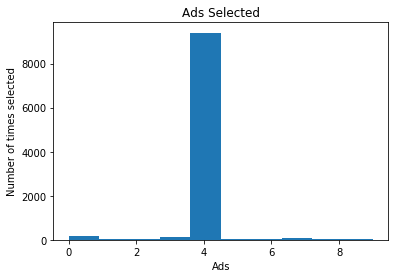

In [8]:
"""
Plot the advertisements selected as a histogram.
- x-axis is the advertisement index
- y-axis is the density (number of times the ad was selected)
"""
plt.hist(ads_selected)
plt.title("Ads Selected")
plt.xlabel("Ads")
plt.ylabel("Number of times selected")
plt.show()